In [1]:
?print

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
# %whos

# 句子长度统计

In [2]:
# coding=utf-8
import json
import os
import re
import sys

import jieba
from tqdm import tqdm
import pandas as pd

sys.path.append("..")

from utils import dir_op


def clean_text(text:str):
    """Clean text by removing unnecessary characters and altering the format of words.
    nlg 任务的时候尽量保持原有的句子结构，不要去除停用词和标点，否则直接影响流畅程度
    """
    text = re.sub(r"\s", "", text)
#     text = " ".join(jieba.cut(text))

    return text


def main():
    root_dir = "data/phvm_data/data.jsonl"
    
# {
#     "feature": [["版型", "显瘦"], ["颜色", "灰色"], ["衣样式", "风衣"], ["衣样式", "外套"], ["衣袖型", "插肩袖"], ["衣门襟", "单排扣"]], 
#     "title": "", 
#     "largeSrc": "http://gw.alicdn.com/imgextra/i2/87171848/TB2BKKiahuTBuNkHFNRXXc9qpXa_!!87171848-2-daren.png_790x10000.jpg", 
#     "refSrc": "https://market.m.taobao.com/apps/market/content/index.html?&contentId=200550500064", 
#     "desc": "设计亮点这款中长款式的风衣外套，修身直筒的版型不仅仅穿着随意舒适，还能够轻松修饰身体轮廓更添高挑大气。时髦的插肩袖设计，也丰富了整体的层次感。衣门襟采用单排扣设计，显得厚实不失质感，很是吸引人的眼球。选用灰色调装饰，搭配起来也比较方便。", 
#     "file": "c0974de49d2bcf5cd49e1bb679f56d2c.jpg"
# }

    with open(root_dir, "r") as fr:
        with open("data/phvm_data/corpus.txt", "w") as fw:
            for line in tqdm(fr.readlines(), desc="评论数据", colour="green"):
                tmp = json.loads(line)
                desc = " ".join(jieba.cut(clean_text(tmp["desc"])))
                fw.write(desc+'\n')

if __name__ == "__main__":
    main()


评论数据:   0%|          | 0/118796 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/3t/1m9xhcvj70jbv7z9vqsrdz2c0000gn/T/jieba.cache
Loading model cost 0.536 seconds.
Prefix dict has been built successfully.
评论数据: 100%|██████████| 118796/118796 [00:56<00:00, 2120.66it/s]


In [41]:
import json
import os
import re
import sys

import jieba
from tqdm import tqdm
import pandas as pd

root_dir = "data/phvm_data/data.jsonl"
    
# {
#     "feature": [["版型", "显瘦"], ["颜色", "灰色"], ["衣样式", "风衣"], ["衣样式", "外套"], ["衣袖型", "插肩袖"], ["衣门襟", "单排扣"]], 
#     "title": "", 
#     "largeSrc": "http://gw.alicdn.com/imgextra/i2/87171848/TB2BKKiahuTBuNkHFNRXXc9qpXa_!!87171848-2-daren.png_790x10000.jpg", 
#     "refSrc": "https://market.m.taobao.com/apps/market/content/index.html?&contentId=200550500064", 
#     "desc": "设计亮点这款中长款式的风衣外套，修身直筒的版型不仅仅穿着随意舒适，还能够轻松修饰身体轮廓更添高挑大气。时髦的插肩袖设计，也丰富了整体的层次感。衣门襟采用单排扣设计，显得厚实不失质感，很是吸引人的眼球。选用灰色调装饰，搭配起来也比较方便。", 
#     "file": "c0974de49d2bcf5cd49e1bb679f56d2c.jpg"
# }

features = {}

with open(root_dir, "r") as fr:
    for line in tqdm(fr.readlines(), desc="评论数据", colour="green"):
        tmp = json.loads(line)
        feat = tmp["feature"]
        for item in feat:
            if item[0] in features.keys():
                features[item[0]].add(item[1])
            else:
                features[item[0]] = set(item[1])

评论数据: 100%|██████████| 118796/118796 [00:00<00:00, 122115.23it/s]


In [46]:
features

{'版型': {'H', '宽松', '显', '显瘦', '瘦', '立体剪裁'},
 '颜色': {'亮黄色',
  '军绿色',
  '卡其色',
  '墨绿色',
  '姜黄色',
  '宝蓝色',
  '杏色',
  '浅灰色',
  '浅绿色',
  '浅色',
  '浅蓝色',
  '海军色',
  '淡蓝色',
  '深色',
  '深蓝色',
  '灰',
  '灰绿色',
  '灰色',
  '焦糖色',
  '玫瑰金色',
  '白色',
  '米白色',
  '粉红色',
  '粉色',
  '紫色',
  '红色',
  '纯色',
  '绿色',
  '肉色',
  '色',
  '蓝紫色',
  '蓝色',
  '薄荷绿色',
  '藏蓝色',
  '裸色',
  '豹纹色',
  '迷彩色',
  '酒红色',
  '金色',
  '银色',
  '香芋紫色',
  '驼色',
  '黄色',
  '黑白',
  '黑色'},
 '衣样式': {'POLO',
  't恤',
  '冲锋衣',
  '卫衣',
  '外套',
  '开衫',
  '毛衣',
  '衣',
  '衫',
  '衬衫',
  '西装',
  '针织衫',
  '风',
  '风衣',
  '马甲'},
 '衣袖型': {'公主袖',
  '包袖',
  '喇叭袖',
  '堆堆袖',
  '插',
  '插肩袖',
  '收口',
  '泡泡袖',
  '灯笼袖',
  '肩',
  '花瓣袖',
  '荷叶袖',
  '落肩袖',
  '蝙蝠袖',
  '衬衫袖',
  '袖',
  '连袖',
  '飞飞袖'},
 '衣门襟': {'一粒扣',
  '三粒扣',
  '单',
  '单排两粒扣',
  '单排多扣',
  '单排扣',
  '双排扣',
  '套头',
  '扣',
  '拉链',
  '排',
  '无扣',
  '暗扣',
  '牛角扣',
  '系带'},
 '类型': {'上衣', '裙', '裤'},
 '图案': {'3D效果',
  '亮面',
  '人物',
  '几何',
  '创意',
  '刺绣',
  '动物',
  '动物纹',
  '千鸟格',
  '卡通',
  '印花',
  '圆点',
  '复古',


In [47]:
web = []

for k, v in features.items():
    web.append({"key": k, "val": list(v)})

In [54]:
import json
json.dump({"data": web}, open('test.json', 'w'), ensure_ascii=False)

In [14]:
import pickle
key_ls = ["<PAD>", "<UNK>"]
key_ls = key_ls + list(features.keys())

pickle.dump(key_ls, open("key.pkl", "wb"))

In [15]:
val_ls = ["<PAD>", "<UNK>"]
for _, v in features.items():
    for s in v:
        val_ls.append(s)
pickle.dump(val_ls, open("val.pkl", "wb"))

In [16]:
len(val_ls), len(key_ls)

(494, 30)

In [44]:
df = pd.read_csv("tmp.tvs", sep="\t")

In [46]:
df.describe()

,Unnamed: 0,feat_len,text_len
count,118766.000000,118766.000000,118766.000000
mean,59382.500000,6.795825,114.206027
std,34284.935373,2.543822,24.848260
min,0.000000,1.000000,21.000000
25%,29691.250000,5.000000,98.000000
50%,59382.500000,7.000000,113.000000
75%,89073.750000,8.000000,129.000000
max,118765.000000,21.000000,204.000000


Text(0.5, 0, 'Text char count')

Text(0.5, 1.0, 'Histogram of char count')

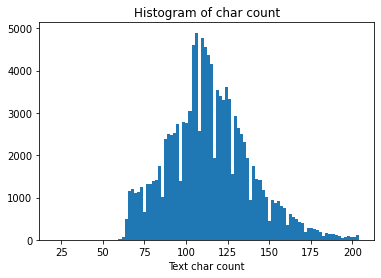

In [51]:
import matplotlib.pyplot as plt
_ = plt.hist(df['text_len'], bins=100)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0.5, 0, 'features count')

Text(0.5, 1.0, 'Histogram of char count')

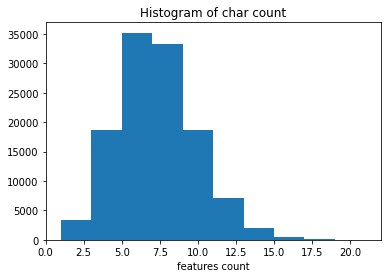

In [53]:
_ = plt.hist(df['feat_len'], bins=10)
plt.xlabel('features count')
plt.title("Histogram of features count")

In [26]:
json.dumps(json.loads("""{"feature": [["类型", "裤"], ["风格", "简约"], ["风格", "潮"], ["图案", "格子"], ["图案", "几何"], ["图案", "线条"], ["裤长", "七分裤"], ["裤型", "阔腿裤"]], "title": "", "largeSrc": "http://gw.alicdn.com/imgextra/i2/646511815/TB2KBRHb1ySBuNjy1zdXXXPxFXa_!!646511815-0-beehive-scenes.jpg_790x10000Q75.jpg", "refSrc": "https://market.m.taobao.com/apps/market/content/index.html?&contentId=200551261363", "desc": "这 款 阔腿裤 ， 整体 设计 简约 利落 ， 时尚 的 阔 腿 款式 带来 鲜明 的 几何 设计 美感 ， 褪去 传统 装束 的 厚重 与 臃肿 ， 更具 轻盈 美感 。 搭配 七分裤 长 修饰 出 挺拔 的 腿部 线条 ， 气质 的 格纹 图案 不 显 单调 ， 尽显 女性 优雅 气质 。 斜门襟 设计 潮流 出众 ， 让 你 时刻 保持 动人 的 女性 风采 。", "file": "fcc77fd7d27d564aed705d99b33e6a39.jpg", "专有属性": [["裤长", "七分裤"], ["裤型", "阔腿裤"], ["类型", "裤"]], "共有属性": [["风格", "简约"], ["风格", "潮"], ["图案", "格子"], ["图案", "几何"], ["图案", "线条"]], "segment": {"seg_0": {"segId": 0, "key_type": ["裤型", "图案", "风格"], "order": [["风格", "简约"], ["裤型", "阔腿裤"], ["图案", "几何"]], "seg": "这 款 阔腿裤 ， 整体 设计 简约 利落 ， 时尚 的 阔 腿 款式 带来 鲜明 的 几何 设计 美感 ， 褪去 传统 装束 的 厚重 与 臃肿 ， 更具 轻盈 美感 。"}, "seg_1": {"segId": 1, "key_type": ["图案", "裤长"], "order": [["裤长", "七分裤"], ["图案", "线条"], ["图案", "格子"]], "seg": "搭配 七分裤 长 修饰 出 挺拔 的 腿部 线条 ， 气质 的 格纹 图案 不 显 单调 ， 尽显 女性 优雅 气质 。"}, "seg_2": {"segId": 2, "key_type": ["风格"], "order": [["风格", "潮"]], "seg": "斜门襟 设计 潮流 出众 ， 让 你 时刻 保持 动人 的 女性 风采 。"}}}
"""), ensure_ascii=False)

'{"feature": [["类型", "裤"], ["风格", "简约"], ["风格", "潮"], ["图案", "格子"], ["图案", "几何"], ["图案", "线条"], ["裤长", "七分裤"], ["裤型", "阔腿裤"]], "title": "", "largeSrc": "http://gw.alicdn.com/imgextra/i2/646511815/TB2KBRHb1ySBuNjy1zdXXXPxFXa_!!646511815-0-beehive-scenes.jpg_790x10000Q75.jpg", "refSrc": "https://market.m.taobao.com/apps/market/content/index.html?&contentId=200551261363", "desc": "这 款 阔腿裤 ， 整体 设计 简约 利落 ， 时尚 的 阔 腿 款式 带来 鲜明 的 几何 设计 美感 ， 褪去 传统 装束 的 厚重 与 臃肿 ， 更具 轻盈 美感 。 搭配 七分裤 长 修饰 出 挺拔 的 腿部 线条 ， 气质 的 格纹 图案 不 显 单调 ， 尽显 女性 优雅 气质 。 斜门襟 设计 潮流 出众 ， 让 你 时刻 保持 动人 的 女性 风采 。", "file": "fcc77fd7d27d564aed705d99b33e6a39.jpg", "专有属性": [["裤长", "七分裤"], ["裤型", "阔腿裤"], ["类型", "裤"]], "共有属性": [["风格", "简约"], ["风格", "潮"], ["图案", "格子"], ["图案", "几何"], ["图案", "线条"]], "segment": {"seg_0": {"segId": 0, "key_type": ["裤型", "图案", "风格"], "order": [["风格", "简约"], ["裤型", "阔腿裤"], ["图案", "几何"]], "seg": "这 款 阔腿裤 ， 整体 设计 简约 利落 ， 时尚 的 阔 腿 款式 带来 鲜明 的 几何 设计 美感 ， 褪去 传统 装束 的 厚重 与 臃肿 ， 更具 轻盈 美感 。"}, "seg_1": {"segId": 1, "key_type":

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['text_len'] = df['text'].apply(lambda x: len(x.split(" ")))
print(df['text_len'].describe())

In [ ]:
_ = plt.hist(df['text_len'], bins=100) # bins 数据划分区间
plt.xlabel('Text char count')
plt.title("Histogram of char count")

# 词频统计

使用gensim训练好的的模型中含有vocab，是按照词频排序的

In [17]:
import pickle
vocab = pickle.load(open("checkpoints/data2text/vocab.pkl", "rb"))

In [18]:
len(vocab)

17486

In [20]:
vocab[:100]

['<PAD>',
 '<S>',
 '<E>',
 '<UNK>',
 '，',
 '的',
 '。',
 '设计',
 '了',
 '<UNK>',
 '感',
 '时尚',
 '又',
 '是',
 '版型',
 '很',
 '让',
 '在',
 '采用',
 '气质',
 '舒适',
 '优雅',
 '有',
 '出',
 '上',
 '这',
 '穿',
 '也',
 '穿着',
 '和',
 '连衣裙',
 '线条',
 '款',
 '面料',
 '你',
 '修饰',
 '宽松',
 '与',
 '搭配',
 '精致',
 '小',
 '不',
 '个性',
 '简约',
 '显瘦',
 '整体',
 '气息',
 '经典',
 '身材',
 '能',
 '可以',
 '更加',
 '更',
 '性感',
 '同时',
 '好',
 '拼接',
 '衬衫',
 '而',
 '印花',
 '女性',
 '点缀',
 '装饰',
 '都',
 '人',
 '休闲',
 '效果',
 '非常',
 '复古',
 '彰显',
 '；',
 '造型',
 '上身',
 '带来',
 '增添',
 '轻松',
 '着',
 '视觉',
 '一款',
 '甜美',
 '显得',
 '还',
 '撞色',
 '十足',
 '裙摆',
 '清新',
 '条纹',
 '给',
 '更显',
 '剪裁',
 '时髦',
 '风格',
 '款式',
 '修身',
 '凸显',
 '展现',
 '感觉',
 '元素',
 '图案',
 '魅力']

# 词云展示

In [5]:
import wordcloud
import jieba
import os

save_dir = "data/imgs"
font_path="/System/Library/fonts/PingFang.ttc"

txt = "一百年前，中国人苦苦寻找适合中国国情的道路。君主立宪制、复辟帝制、议会制、多党制、总统制都想过了、试过了，结果都行不通。最后，中国选择了社会主义道路"
seg_list = " ".join(jieba.cut(txt))
w=wordcloud.WordCloud(font_path=font_path)
w.generate(seg_list)
w.to_file(os.path.join(save_dir, "cloud.png"))

In [8]:
from gensim.models import Word2Vec

In [9]:
model = Word2Vec.load("checkpoints/word2vec/word2vec.model")

In [13]:
# 获取所有词
vocab = model.wv.index2word
# 获取所有向量
word_vectors = model.wv.vectors

In [37]:
id2vec = model.wv.vectors.tolist()
id2word = model.wv.index2word
vocab = ["<PAD>", "<S>", "<E>", "<UNK>"]
vectors = []

for i in range(len(vocab)):
    vectors.append(list(np.random.uniform(low=-0.1, high=0.1, size=(300,))))

vocab = vocab + id2word
vectors = vectors + id2vec

In [44]:
np.savetxt("vectors.txt", vectors)

In [4]:
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for idx, word in enumerate(vocab)}

In [5]:
import tensorflow as tf

In [6]:
word_embedding = tf.get_variable("word_embedding", dtype=tf.float32,
                                 initializer=tf.constant(word_vector, dtype=tf.float32))

In [7]:
x = tf.nn.embedding_lookup(word_embedding, 0)

In [9]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    z = sess.run(x)

In [3]:
import numpy as np

In [7]:
len(list(np.random.uniform(low=-0.1, high=0.1, size=))

SyntaxError: unexpected EOF while parsing (<ipython-input-7-32cff6d290d1>, line 1)

# 处理新数据

In [38]:
import json
with open("data/data2text/train.json", "r") as f:
    lines = f.readlines()

In [40]:
feat_len = []
seg_len = []
with open("data/data2text/corpus.txt", "w") as f:
    for line in lines:
        record = json.loads(line)
        for _, seg in record["segment"].items():
            feat_len.append(len(seg["order"]))
            f.write(seg["seg"])
#             tokens = seg["seg"].split()
#             seg_len.append(len(tokens))

In [34]:
import pandas as pd
df = pd.DataFrame(feat_len)
df.describe()

,0
count,369403.000000
mean,2.153651
std,1.634395
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,20.000000


In [35]:
df = pd.DataFrame(seg_len)
df.describe()

,0
count,369403.000000
mean,20.605442
std,10.100121
min,0.000000
25%,13.000000
50%,19.000000
75%,25.000000
max,112.000000


In [13]:
features

[[['风格', '简约'], ['材质', '牛仔布'], ['衣样式', '外套'], ['颜色', '白色']],
 [['衣款式', '破洞']],
 [['图案', '刺绣']]]

In [14]:
segs

['简约 而 不 简单 的 牛仔 外套 ， 白色 的 衣身 十分 百搭 。',
 '衣身 多处 有 做 旧 破洞 设计 ， 打破 单调乏味 ， 增加 一丝 造型 看点 。',
 '衣 身后 背处 有 趣味 刺绣 装饰 ， 丰富 层次感 ， 彰显 别样 时尚 。']